In [566]:
!pip install pandas matplotlib seaborn

In [567]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Read CSV
- select columns
- Divide in X, Y numpy vectors
- Implement Random Forest / fit and score

In [568]:
df_train = pd.read_csv('kaggle/housing_price/advanced/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [569]:
# from sklearn import tree

df_selected = df_train[["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]]

y = df_selected['SalePrice'].to_numpy()
X = df_selected[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]].to_numpy()

# clf = tree.DecisionTreeRegressor()
# clf.fit(X, y)

# tree.plot_tree(clf)

# RandomForest

In [570]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

regr.score(X, y)

0.6967758140085623

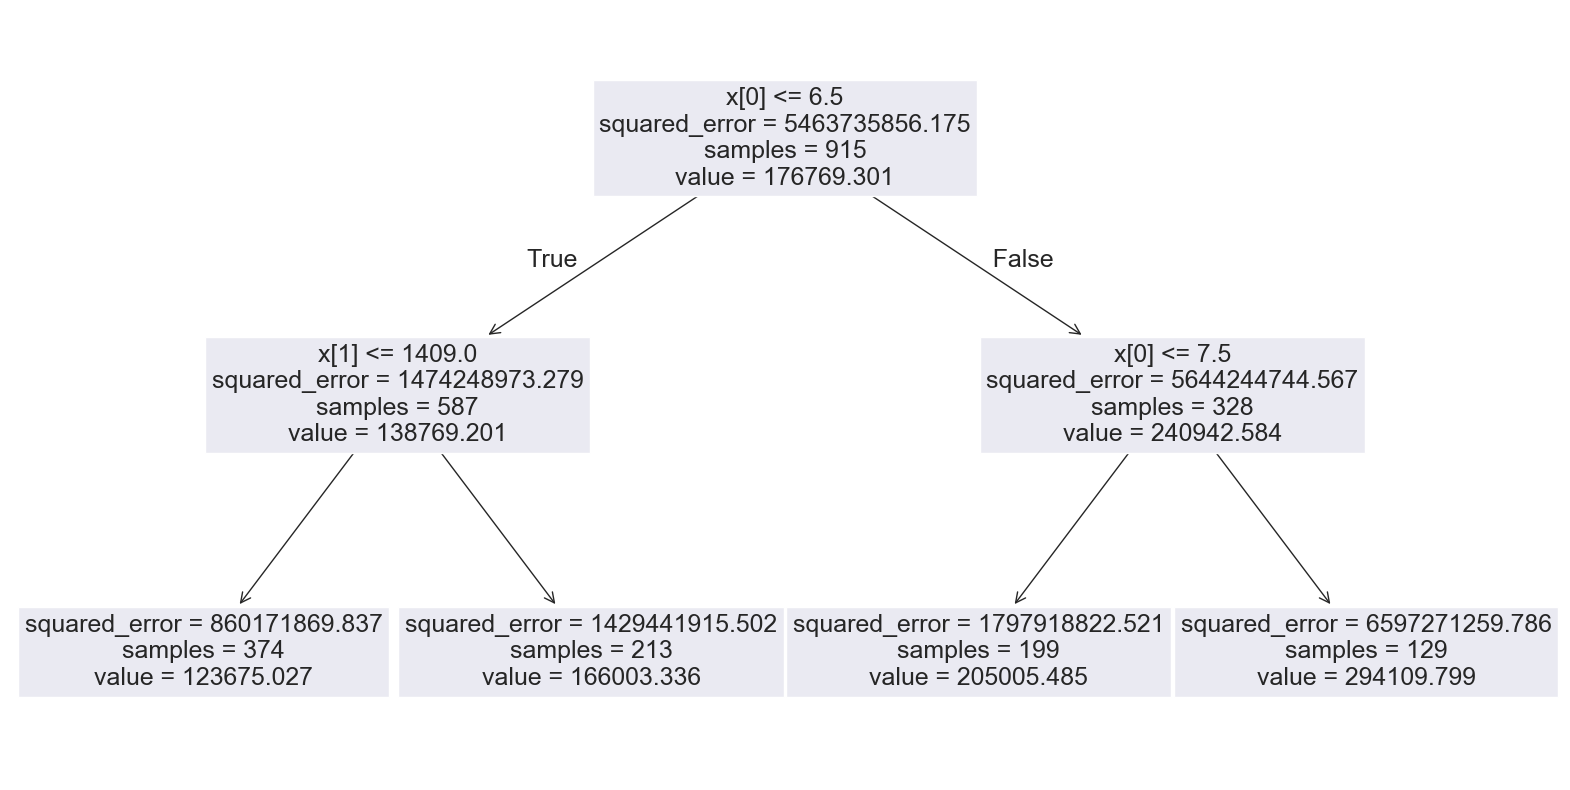

In [571]:
from sklearn.tree import plot_tree

tree = regr.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree)
plt.show()

In [572]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

reg = RandomForestRegressor(max_depth=3, random_state=0)
reg

RandomForestRegressor(max_depth=3, random_state=0)

In [573]:
reg.fit(X_train, y_train)
reg.score(X_val, y_val)

0.8100228723388516

In [574]:
df_test = pd.read_csv('kaggle/housing_price/advanced/test.csv')
X_test = df_test[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]].to_numpy()
y_pred = reg.predict(X_test)

In [575]:
# df_test["SalePrice"] = y_pred
# df_pred = df_test[["Id", "SalePrice"]]
# df_pred.to_csv('prediction.csv', index=False)

In [576]:
# !kaggle competitions submit -c house-prices-advanced-regression-techniques -f prediction.csv -m less_depth

In [577]:
from sklearn.ensemble import HistGradientBoostingRegressor, GradientBoostingRegressor
reg_2 = HistGradientBoostingRegressor(random_state=1)
reg_2.fit(X_train, y_train)
reg_2.score(X_val, y_val)

0.8634596611194398

In [578]:
df_test = pd.read_csv('kaggle/housing_price/advanced/test.csv')
X_test = df_test[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]].fillna(0).to_numpy()
y_pred = reg_2.predict(X_test)
df_test["SalePrice"] = y_pred
df_pred = df_test[["Id", "SalePrice"]]
df_pred.to_csv('prediction_gradient.csv', index=False)
# !kaggle competitions submit -c house-prices-advanced-regression-techniques -f prediction_gradient.csv -m gradient_test

In [579]:
!pip install scikit-learn==1.5.2

In [580]:
!pip list

Package            Version
------------------ -----------
appnope            0.1.4
asttokens          3.0.0
bleach             6.2.0
certifi            2024.12.14
charset-normalizer 3.4.1
comm               0.2.2
contourpy          1.3.1
cycler             0.12.1
debugpy            1.8.11
decorator          5.1.1
executing          2.1.0
fonttools          4.55.3
idna               3.10
ipykernel          6.29.5
ipython            8.31.0
jedi               0.19.2
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
kaggle             1.6.17
kiwisolver         1.4.8
matplotlib         3.10.0
matplotlib-inline  0.1.7
nest-asyncio       1.6.0
numpy              2.2.1
packaging          24.2
pandas             2.2.3
parso              0.8.4
pexpect            4.9.0
pillow             11.1.0
pip                24.3.1
platformdirs       4.3.6
prompt_toolkit     3.0.48
psutil             6.1.1
ptyprocess         0.7.0
pure_eval          0.2.3
Pygments           2.19.1
py

In [581]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [582]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(np.log(my_model.predict(X_val)), np.log(y_val))

np.float64(0.18510710145775214)

In [583]:
my_model_2 = XGBRegressor(max_depth=3, early_stopping_rounds = 10, eval_metric="rmse", learning_rate=0.1)
my_model_2.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

print(f"Best score RMSE : {my_model_2.best_score}, best iteration : {my_model_2.best_iteration}")
print(f"Possible kaggle score : {root_mean_squared_error(np.log(my_model_2.predict(X_val)), np.log(y_val))}")

[0]	validation_0-rmse:78878.49861
[1]	validation_0-rmse:74099.01826
[2]	validation_0-rmse:69715.20930
[3]	validation_0-rmse:65813.53829
[4]	validation_0-rmse:61984.11841
[5]	validation_0-rmse:58926.57818
[6]	validation_0-rmse:56055.04219
[7]	validation_0-rmse:53685.60434
[8]	validation_0-rmse:51249.62805
[9]	validation_0-rmse:49197.42326
[10]	validation_0-rmse:47471.10114
[11]	validation_0-rmse:45700.31728
[12]	validation_0-rmse:44230.44148
[13]	validation_0-rmse:42902.61936
[14]	validation_0-rmse:41917.77550
[15]	validation_0-rmse:40853.22038
[16]	validation_0-rmse:40008.44397
[17]	validation_0-rmse:39233.14733
[18]	validation_0-rmse:38350.44326
[19]	validation_0-rmse:37608.46142
[20]	validation_0-rmse:37150.03845
[21]	validation_0-rmse:36724.69521
[22]	validation_0-rmse:36068.80526
[23]	validation_0-rmse:35669.09198
[24]	validation_0-rmse:35415.68654
[25]	validation_0-rmse:34924.37230
[26]	validation_0-rmse:34624.52404
[27]	validation_0-rmse:34385.07622
[28]	validation_0-rmse:34346.9

In [584]:
!pip install kaggle

df_test = pd.read_csv('kaggle/housing_price/advanced/test.csv')
X_test = df_test[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]].fillna(0).to_numpy()
y_pred = my_model_2.predict(X_test)
df_test["SalePrice"] = y_pred
df_pred = df_test[["Id", "SalePrice"]]
df_pred.to_csv('prediction_xgboost.csv', index=False)
# !kaggle competitions submit -c house-prices-advanced-regression-techniques -f prediction_gradient.csv -m xgboost_md_3_lr01

# C'est l'heure de tout nettoyer

In [585]:
df_train = pd.read_csv('kaggle/housing_price/advanced/train.csv')
df_train = df_train.drop(
    df_train[(df_train["GrLivArea"]>4000) & (df_train['SalePrice']<300000)].index
    )

df_train.loc[df_train['SalePrice'].isna()]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


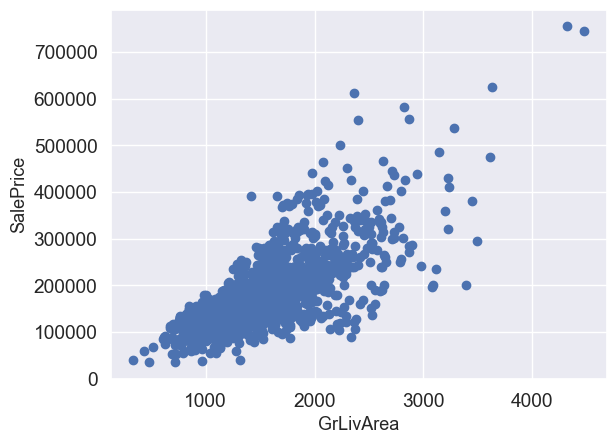

In [586]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel("SalePrice", fontsize = 13)
plt.xlabel("GrLivArea", fontsize = 13)
plt.show()

In [587]:
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print(f"All data size : {all_data.shape}")

All data size : (2917, 80)


In [588]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
MasVnrType,60.541652
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806


In [589]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

# Permet de le relancer sans risque si besoin d'affiner/itérer
try:
    all_data = all_data.drop(['Utilities'], axis=1)
except:
    pass

all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")



#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [590]:
# to have categorical variables

all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [591]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 79)


In [592]:
all_data[list(cols)]

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,3,2,4,5,5,2,4,0,3,2,...,0,3,2,1,1,1,10,4,2,4
1,5,2,4,5,5,3,4,0,3,3,...,0,3,2,1,1,1,5,7,1,7
2,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,10,4,2,11
3,2,4,1,5,5,3,4,2,3,2,...,0,0,2,1,1,1,11,4,0,4
4,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,10,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,3,4,4,3,3,3,4,2,3,3,...,0,3,2,1,1,1,2,6,0,8
2913,3,4,4,5,5,3,4,4,3,3,...,0,3,2,1,1,1,2,4,0,6
2914,5,4,4,5,5,3,4,0,3,3,...,0,3,2,1,1,1,5,6,0,11
2915,3,2,4,3,3,3,4,4,3,3,...,0,3,2,1,1,1,14,4,0,9


In [593]:
# Adding total sqfootage feature
all_data["TotalSF"] = all_data['TotalBsmtSF'] + all_data["1stFlrSF"] + all_data['2ndFlrSF']
all_data.TotalSF

0       2566.0
1       2524.0
2       2706.0
3       2473.0
4       3343.0
         ...  
2912    1638.0
2913    1638.0
2914    2448.0
2915    1882.0
2916    2996.0
Name: TotalSF, Length: 2917, dtype: float64

In [594]:
cpt = 0
for c in all_data.columns:
    cpt += 1 if all_data[c].dtype == 'O' else 0
print(f"number of category non numeric : {cpt}")

number of category non numeric : 20


In [595]:
all_data = all_data.drop(
    all_data[[c for c in all_data.columns if all_data[c].dtype == 'O']].columns, axis=1
)

all_data

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,TotalSF
0,1,10,65.0,8450,1,1,3,0,7,4,...,0,0,0,0,3,4,0,4,2,2566.0
1,2,5,80.0,9600,1,1,3,0,6,7,...,0,0,0,0,3,4,0,7,1,2524.0
2,3,10,68.0,11250,1,1,0,0,7,4,...,0,0,0,0,3,4,0,11,2,2706.0
3,4,11,60.0,9550,1,1,0,0,7,4,...,272,0,0,0,3,4,0,4,0,2473.0
4,5,10,84.0,14260,1,1,0,0,8,4,...,0,0,0,0,3,4,0,3,2,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2915,2,21.0,1936,1,1,3,0,4,6,...,0,0,0,0,3,4,0,8,0,1638.0
2913,2916,2,21.0,1894,1,1,3,0,4,4,...,0,0,0,0,3,4,0,6,0,1638.0
2914,2917,5,160.0,20000,1,1,3,0,5,6,...,0,0,0,0,3,4,0,11,0,2448.0
2915,2918,14,62.0,10441,1,1,3,0,5,4,...,0,0,0,0,3,2,700,9,0,1882.0


In [606]:
df_train_processed = all_data.iloc[:df_train.shape[0]]
df_test = all_data.iloc[df_train.shape[0]:]

print(df_train.shape, df_train_processed.shape)
df_test

(1458, 81) (1458, 60)


,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,TotalSF
1458,1461,5,80.0,11622,1,1,3,0,5,5,...,0,0,120,0,3,2,0,8,4,1778.0
1459,1462,5,81.0,14267,1,1,0,0,6,5,...,0,0,0,0,3,4,12500,8,4,2658.0
1460,1463,10,74.0,13830,1,1,0,0,5,4,...,0,0,0,0,3,2,0,5,4,2557.0
1461,1464,10,78.0,9978,1,1,0,0,6,5,...,0,0,0,0,3,4,0,8,4,2530.0
1462,1465,0,43.0,5005,1,1,0,0,8,4,...,0,0,144,0,3,4,0,0,4,2560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2915,2,21.0,1936,1,1,3,0,4,6,...,0,0,0,0,3,4,0,8,0,1638.0
2913,2916,2,21.0,1894,1,1,3,0,4,4,...,0,0,0,0,3,4,0,6,0,1638.0
2914,2917,5,160.0,20000,1,1,3,0,5,6,...,0,0,0,0,3,4,0,11,0,2448.0
2915,2918,14,62.0,10441,1,1,3,0,5,4,...,0,0,0,0,3,2,700,9,0,1882.0


In [597]:
#df_train_processed["SalePrice"] = df_train["SalePrice"] # pété

In [598]:
# corrmat = df_train_processed.corr(numeric_only=True)
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=0.8, square=True)
# plt.show()

In [599]:
# k = 10 #number of variables for heatmap
# cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# cm = np.corrcoef(df_train_processed[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [600]:
X = df_train_processed.to_numpy()
y = df_train['SalePrice'].to_numpy().reshape(-1, 1)
assert X.shape[0] == y.shape[0]
X_train,X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

reg = RandomForestRegressor(n_estimators=1000, max_depth=30, random_state=0)
reg
df_train_processed

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,TotalSF
0,1,10,65.0,8450,1,1,3,0,7,4,...,0,0,0,0,3,4,0,4,2,2566.0
1,2,5,80.0,9600,1,1,3,0,6,7,...,0,0,0,0,3,4,0,7,1,2524.0
2,3,10,68.0,11250,1,1,0,0,7,4,...,0,0,0,0,3,4,0,11,2,2706.0
3,4,11,60.0,9550,1,1,0,0,7,4,...,272,0,0,0,3,4,0,4,0,2473.0
4,5,10,84.0,14260,1,1,0,0,8,4,...,0,0,0,0,3,4,0,3,2,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1456,10,62.0,7917,1,1,3,0,6,4,...,0,0,0,0,3,4,0,10,1,2600.0
1454,1457,5,85.0,13175,1,1,3,0,6,5,...,0,0,0,0,3,2,0,4,4,3615.0
1455,1458,11,66.0,9042,1,1,3,0,7,8,...,0,0,0,0,3,0,2500,7,4,3492.0
1456,1459,5,68.0,9717,1,1,3,0,5,5,...,112,0,0,0,3,4,0,6,4,2156.0


In [601]:
reg.fit(X_train, y_train)

/Users/strurphe/iim/python_and_ai/.venv/lib/python3.13/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=30, n_estimators=1000, random_state=0)

In [602]:
print(f"score model : {reg.score(X_val, y_val)}")
print(f"score RMSE {root_mean_squared_error(np.log(reg.predict(X_val)), np.log(y_val))}")

score model : 0.9091487681296875
score RMSE 0.1381147317753253


## Test GBoost

In [603]:
reg2 = XGBRegressor(max_depth=3, early_stopping_rounds = 10, eval_metric="rmse", learning_rate=0.1)
reg2.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

print(f"Best score RMSE : {reg2.best_score}, best iteration : {reg2.best_iteration}")
print(f"Possible kaggle score : {root_mean_squared_error(np.log(reg2.predict(X_val)), np.log(y_val))}")

[0]	validation_0-rmse:72126.39952
[1]	validation_0-rmse:67686.58064
[2]	validation_0-rmse:63539.58486
[3]	validation_0-rmse:59910.24811
[4]	validation_0-rmse:56433.06588
[5]	validation_0-rmse:53581.37157
[6]	validation_0-rmse:50683.71626
[7]	validation_0-rmse:47838.39674
[8]	validation_0-rmse:45652.36440
[9]	validation_0-rmse:43926.08143
[10]	validation_0-rmse:41742.82722
[11]	validation_0-rmse:39928.85931
[12]	validation_0-rmse:38364.07357
[13]	validation_0-rmse:37022.96221
[14]	validation_0-rmse:35463.57003
[15]	validation_0-rmse:34411.52552
[16]	validation_0-rmse:33102.69925
[17]	validation_0-rmse:32240.98595
[18]	validation_0-rmse:31480.85802
[19]	validation_0-rmse:30511.68552
[20]	validation_0-rmse:29744.25324
[21]	validation_0-rmse:29076.18491
[22]	validation_0-rmse:28376.69845
[23]	validation_0-rmse:27939.43559
[24]	validation_0-rmse:27356.63031
[25]	validation_0-rmse:26898.99942
[26]	validation_0-rmse:26516.69459
[27]	validation_0-rmse:26059.23585
[28]	validation_0-rmse:25604.0

In [604]:
df_test

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,TotalSF
1458,1461,5,80.0,11622,1,1,3,0,5,5,...,0,0,120,0,3,2,0,8,4,1778.0
1459,1462,5,81.0,14267,1,1,0,0,6,5,...,0,0,0,0,3,4,12500,8,4,2658.0
1460,1463,10,74.0,13830,1,1,0,0,5,4,...,0,0,0,0,3,2,0,5,4,2557.0
1461,1464,10,78.0,9978,1,1,0,0,6,5,...,0,0,0,0,3,4,0,8,4,2530.0
1462,1465,0,43.0,5005,1,1,0,0,8,4,...,0,0,144,0,3,4,0,0,4,2560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2915,2,21.0,1936,1,1,3,0,4,6,...,0,0,0,0,3,4,0,8,0,1638.0
2913,2916,2,21.0,1894,1,1,3,0,4,4,...,0,0,0,0,3,4,0,6,0,1638.0
2914,2917,5,160.0,20000,1,1,3,0,5,6,...,0,0,0,0,3,4,0,11,0,2448.0
2915,2918,14,62.0,10441,1,1,3,0,5,4,...,0,0,0,0,3,2,700,9,0,1882.0


In [605]:
X_test = df_test.to_numpy()
y_pred = reg2.predict(X_test)
df_test["SalePrice"] = y_pred
df_pred = df_test[["Id", "SalePrice"]]
df_pred.to_csv('prediction_xgboost.csv', index=False)

/var/folders/0j/4d9b0cqx6h179_k7ttdkvs5h0000gn/T/ipykernel_66637/1503556434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["SalePrice"] = y_pred


In [3]:
!kaggle competitions download -c spaceship-titanic

100%|█████████████████████████████████████████| 299k/299k [00:00<00:00, 806kB/s]
100%|█████████████████████████████████████████| 299k/299k [00:00<00:00, 804kB/s]
